In [138]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random
import numpy as np
import math

In [2]:
dataset = torchvision.datasets.MNIST(
            root="data",
            train=True,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])
            ]),
            download=True
        )

In [81]:
def get_sub_dataset(dataset, classes=(0, 1)):
    subset = deepcopy(dataset)
    targets = subset.targets
    data = torch.cat((
        subset.data[targets == classes[0]], 
        subset.data[targets == classes[1]]
    ), axis=0)
    targets = torch.cat((
        targets[targets == classes[0]],
        targets[targets==classes[1]]
    )) 
    targets[targets == classes[0]] = 0
    targets[targets == classes[1]] = 1
    subset.data = data
    subset.targets = targets
    return subset

def get_data(dist, N, seed):
    np.random.seed(seed)
    idx = np.random.choice(len(dist), N, replace=False)
    return dist.data[idx].numpy(), dist.targets[idx].numpy()

In [82]:
t = 13
N = 5

In [83]:
unit = [1] * N + [0] * N
pattern = np.array((unit * math.ceil(t/(2*N)))[:t]).astype("bool")

In [84]:
dist_A = get_sub_dataset(dataset, (0, 1))
dist_B = get_sub_dataset(dataset, (2, 3))

In [100]:
data, targets = get_data(dist_A, sum(pattern), 1996)
seqData_shape = (t,) + data.shape[1:]
seqData = np.zeros(seqData_shape)
seqLab = np.zeros((t,))
seqData[pattern], seqLab[pattern] = data, targets
seqData[~pattern], seqLab[~pattern] = get_data(dist_B, sum(~pattern), 1996)

In [106]:
seqData = torch.from_numpy(seqData)
seqLab = torch.from_numpy(seqLab).long()

TypeError: expected np.ndarray (got Tensor)

In [136]:
pattern = np.array((unit * math.ceil((t+T)/(2*N))))[t:t+T]

In [152]:
def get_pattern(N):
    return [1] * N + [0] * N

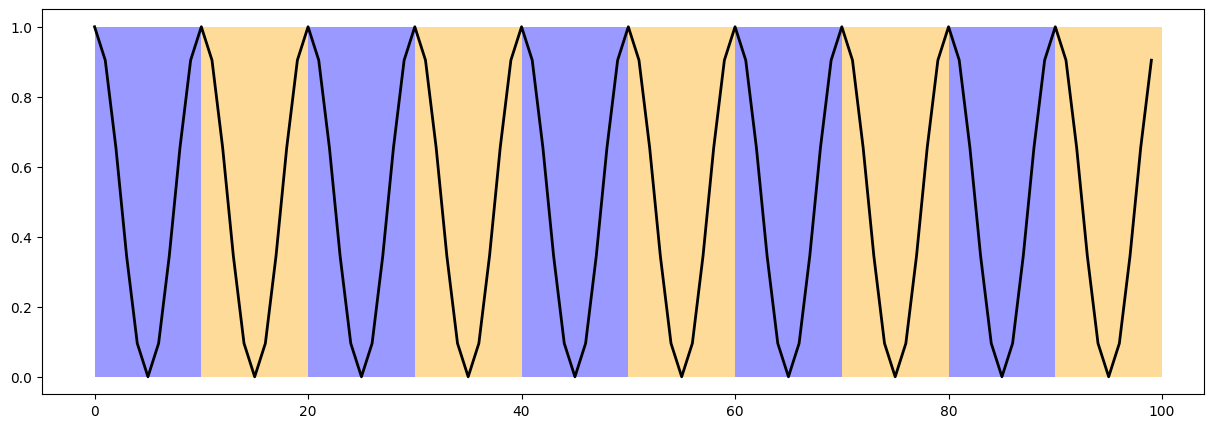

In [171]:
fig, ax = plt.subplots(figsize=(15, 5))
t = np.arange(100)
ax.plot(t, 0.5*(1+np.cos(2 * np.pi / 10 * t)), c='k', lw=2)

unit = get_pattern(10)
pattern = np.array((unit * math.ceil(len(t)/(2*N)))[:len(t)]).astype("bool")

for i in t[pattern]:
    ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.4, edgecolor=None, facecolor="blue"))
for i in t[~pattern]:
    ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.4, edgecolor=None, facecolor="orange"))

In [166]:
a = t[pattern]

In [167]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])